# 어떤 무선 청소기가 좋을까?

* 흡입력도 약하고 배터리도 오래 가지 않아 대중화되지는 않는다.
* 하지만 모터와 배터리 기술이 향상된 다이슨 무선 청소기가 나오면서 이슈가 됐고
* 국내 기업들은 높은 성능의 제품을 내놓으면서 상품의 종류도 다양해졌고
* 샤오미 무선 청소기 같은 합리적인 가격대 제품들도 출시되면서 선택의 폭도 넓어졌다.


#### 제조사별 무선 청소기의 가격과 성능 데이터 수집하고 분석
#### 각자의 상황에 맞는 제품군이 무엇인지 분석

## 1. 데이터 수집 1_한페이지 크롤링

### 다나와 검색 페이지 접속

In [27]:
from selenium import webdriver
driver = webdriver.Chrome('../driver/chromedriver.exe')
url = "http://search.danawa.com/dsearch.php?query=무선청소기&tab=main"
driver.get(url)

C:\Users\dlfrl\AppData\Local\Temp/ipykernel_51044/1219073168.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('../driver/chromedriver.exe')


In [28]:
from bs4 import BeautifulSoup
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [11]:
prod_items = soup.select('li.prod_item ')
len(prod_items)

45

### 40개가 나와야 하는데 더 많이 나와서 상위 태그로 계속 확인해보는 작업
* 광고 제품들이 중간중간 들어가있음

In [14]:
prod_items = soup.select('ul.product_list > li.prod_item')
len(prod_items)

45

In [29]:
prod_items = soup.select('div.main_prodlist_list > ul.product_list > li.prod_item')
len(prod_items)

44

### 첫번째 제품 불러오자

In [30]:
title = prod_items[0]
title

<li class="prod_item" id="productItem15170459">
<input id="productItem_categoryInfo_15170459" type="hidden" value="생활가전_청소기"/>
<input id="min_price_15170459" type="hidden" value="580040"/>
<div class="prod_main_info">
<div class="thumb_image">
<a class="thumb_link click_log_product_standard_img_" href="http://prod.danawa.com/info/?pcode=15170459&amp;keyword=%EB%AC%B4%EC%84%A0%EC%B2%AD%EC%86%8C%EA%B8%B0&amp;cate=102207" id="thumbLink_15170459" onmousedown="_trkEventLog('통합검색_상품블로그_유입');" target="_blank">
<img alt="제트 VS20A956A3" onerror="this.onerror=null; this.src='//img.danawa.com/new/noData/img/noImg_160.gif';" src="//img.danawa.com/prod_img/500000/459/170/img/15170459_1.jpg?shrink=130:130&amp;_v=20210906145322"/>
</a>
<a class="btn_view_zoom" data-assemblygallerycategory="N" href="#" id="imageZoom_15170459" onclick="return false;">
<span class="ico i_zoom_vw"></span>이미지보기
						</a>
<input id="hidden_cate_sub_c1" type="hidden" value="72"/>
<input id="hidden_cate_sub_c2" type="hidden

In [31]:
# 상품명
title = prod_items[0].select('p.prod_name > a')[0].text.strip() #좌우공백제거
print(title)

삼성전자 비스포크 제트 VS20A956A3


In [36]:
#스펙모록
spec_list = prod_items[0].select('div.spec_list')[0].text.strip()
print(spec_list)

핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 흡입력: 210W / 제트싸이클론 / 디지털인버터모터 / [배터리] 충전시간: 3시간30분 / 사용시간(개당): 1시간 / 분리형 (1개) / 리튬이온 / [필터] 5단계여과 / [기능] 자동물공급 / 디스플레이표시창 / 배터리잔량표시 / 자동먼지비움 / [구성] 바닥 / 솔형 / 틈새 / 연장툴 / 청정스테이션 / [부가] 먼지통용량: 0.5L / 색상: 미스티화이트 / 무게: 2.5kg / 액세서리크래들  / 크기(가로x세로x깊이): 250x930x202mm


In [35]:
#가격정보
price = prod_items[0].select('li.rank_one > p.price_sect > a > strong')[0].text.strip().replace(",","")
print(price)

580040


In [38]:
#반복문으로 검색 결과의 상품 추출
prod_data=[]
for prod_item in prod_items:
    try: #상품명 
        title = prod_items[0].select('p.prod_name > a')[0].text.strip()
    except:
        title = ''
    try: #스펙정보
        spec_list = prod_items[0].select('div.spec_list')[0].text.strip()
    except:
        spec_list = ''
    try : #가격정보
        price = prod_items[0].select('li.rank_one > p.price_sect > a > strong')[0].text.strip().replace(",","")
    except:
        price = 0
    
    prod_data.append([title, spec_list, price])

print(len(prod_data))
print(prod_data)
        

44
[['삼성전자 비스포크 제트 VS20A956A3', '핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 흡입력: 210W / 제트싸이클론 / 디지털인버터모터 / [배터리] 충전시간: 3시간30분 / 사용시간(개당): 1시간 / 분리형 (1개) / 리튬이온 / [필터] 5단계여과 / [기능] 자동물공급 / 디스플레이표시창 / 배터리잔량표시 / 자동먼지비움 / [구성] 바닥 / 솔형 / 틈새 / 연장툴 / 청정스테이션 / [부가] 먼지통용량: 0.5L / 색상: 미스티화이트 / 무게: 2.5kg / 액세서리크래들  / 크기(가로x세로x깊이): 250x930x202mm', '580040'], ['삼성전자 비스포크 제트 VS20A956A3', '핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 흡입력: 210W / 제트싸이클론 / 디지털인버터모터 / [배터리] 충전시간: 3시간30분 / 사용시간(개당): 1시간 / 분리형 (1개) / 리튬이온 / [필터] 5단계여과 / [기능] 자동물공급 / 디스플레이표시창 / 배터리잔량표시 / 자동먼지비움 / [구성] 바닥 / 솔형 / 틈새 / 연장툴 / 청정스테이션 / [부가] 먼지통용량: 0.5L / 색상: 미스티화이트 / 무게: 2.5kg / 액세서리크래들  / 크기(가로x세로x깊이): 250x930x202mm', '580040'], ['삼성전자 비스포크 제트 VS20A956A3', '핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 흡입력: 210W / 제트싸이클론 / 디지털인버터모터 / [배터리] 충전시간: 3시간30분 / 사용시간(개당): 1시간 / 분리형 (1개) / 리튬이온 / [필터] 5단계여과 / [기능] 자동물공급 / 디스플레이표시창 / 배터리잔량표시 / 자동먼지비움 / [구성] 바닥 / 솔형 / 틈새 / 연장툴 / 청정스테이션 / [부가] 먼지통용량: 0.5L / 색상: 미스티화이트 / 무게: 2.5kg / 액세서리크래들  / 크기(가로

In [118]:
# 상품 정보 태그에서 원하는 정보를 추출하는 함수
def get_prod_items(prod_items):
    prod_data = []
    
    for prod_item in prod_items:
        # 상품명 가져오기
        try:
            title = prod_item.select('p.prod_name > a')[0].text.strip()
        except:
            title = ''
        # 스펙 목록 가져오기
        try: 
            spec_list = prod_item.select('div.spec_list')[0].text.strip()
        except:
            spec_list = ''
        # 가격 정보 가져오기 
        try: 
            price = int(prod_item.select('li.rank_one > p.price_sect > a > strong')[0].text.strip().replace(",",""))
        except:
            price = 0
        prod_data.append([title, spec_list, price])
        
    return prod_data

In [40]:
#함수 테스트
prod_items = soup.select('div.main_prodlist_list > ul.product_list > li.prod_item')
prod_data = get_prod_items(prod_items)
print(len(prod_data))
prod_data

44


[['삼성전자 비스포크 제트 VS20A956A3',
  '핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 흡입력: 210W / 제트싸이클론 / 디지털인버터모터 / [배터리] 충전시간: 3시간30분 / 사용시간(개당): 1시간 / 분리형 (1개) / 리튬이온 / [필터] 5단계여과 / [기능] 자동물공급 / 디스플레이표시창 / 배터리잔량표시 / 자동먼지비움 / [구성] 바닥 / 솔형 / 틈새 / 연장툴 / 청정스테이션 / [부가] 먼지통용량: 0.5L / 색상: 미스티화이트 / 무게: 2.5kg / 액세서리크래들  / 크기(가로x세로x깊이): 250x930x202mm',
  '580040'],
 ['삼성전자 비스포크 제트 VS20A956A3',
  '핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 흡입력: 210W / 제트싸이클론 / 디지털인버터모터 / [배터리] 충전시간: 3시간30분 / 사용시간(개당): 1시간 / 분리형 (1개) / 리튬이온 / [필터] 5단계여과 / [기능] 자동물공급 / 디스플레이표시창 / 배터리잔량표시 / 자동먼지비움 / [구성] 바닥 / 솔형 / 틈새 / 연장툴 / 청정스테이션 / [부가] 먼지통용량: 0.5L / 색상: 미스티화이트 / 무게: 2.5kg / 액세서리크래들  / 크기(가로x세로x깊이): 250x930x202mm',
  '580040'],
 ['삼성전자 비스포크 제트 VS20A956A3',
  '핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 흡입력: 210W / 제트싸이클론 / 디지털인버터모터 / [배터리] 충전시간: 3시간30분 / 사용시간(개당): 1시간 / 분리형 (1개) / 리튬이온 / [필터] 5단계여과 / [기능] 자동물공급 / 디스플레이표시창 / 배터리잔량표시 / 자동먼지비움 / [구성] 바닥 / 솔형 / 틈새 / 연장툴 / 청정스테이션 / [부가] 먼지통용량: 0.5L / 색상: 미스티화이트 / 무게: 2.5kg / 액세서리크래들

## 2. 데이터 수집 2_여러페이지

In [119]:
# 다나와 검색 URL을 만들어주는 함수 
def get_search_page_url(keyword, page):
    return 'http://search.danawa.com/dsearch.php?query={}&volumeType=allvs&page={}&limit=40&sort=saveDESC&list=list&boost=true&addDelivery=N&tab=goods&tab=goods'.format(keyword, page)

keyword = '무선청소기'
page = 4
url = get_search_page_url(keyword, page)
print(url)


http://search.danawa.com/dsearch.php?query=무선청소기&volumeType=allvs&page=4&limit=40&sort=saveDESC&list=list&boost=true&addDelivery=N&tab=goods&tab=goods


### 여러 페이지에 걸친 상품 정보 수집

In [120]:
# 실전 다나와 크롤링
from selenium import webdriver
import time
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook

driver = webdriver.Chrome('../driver/chromedriver.exe')
driver.implicitly_wait(3)

keyword = '무선청소기'
total_page = 10
prod_data_total = []

for page in tqdm_notebook(range(1, total_page + 1)):
    url = get_search_page_url(keyword, page)
    driver.get(url)
    time.sleep(5)
    
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    
    # 상품 정보 추출
    #soup.select('조건') : #기호 뒤에 id 값을 넣거나 .뒤에 class명을 넣음
    prod_items = soup.select('div#productListArea > div.main_prodlist > ul.product_list > li.prod_item')
    prod_item_list = get_prod_items(prod_items)
    
    # 추출 데이터 저장
    prod_data_total = prod_data_total + prod_item_list

C:\Users\dlfrl\AppData\Local\Temp/ipykernel_51044/3660632929.py:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('../driver/chromedriver.exe')
C:\Users\dlfrl\AppData\Local\Temp/ipykernel_51044/3660632929.py:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for page in tqdm_notebook(range(1, total_page + 1)):


  0%|          | 0/10 [00:00<?, ?it/s]

### 수집데이터 저장

In [117]:
#데이터 저장
import pandas as pd
data = pd.DataFrame(prod_data_total)
data.columns = ['상품명', '스펙 목록', '가격']
data.to_excel('../data/11_danawa_crawling_result.xlsx', index = False)

## 크롤링 데이터 전처리

### 다나와 크롤링 데이터 불러오기

In [57]:
import pandas as pd

data = pd.read_excel('../data/1_danawa_crawling_result.xlsx')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상품명     300 non-null    object
 1   스펙 목록   300 non-null    object
 2   가격      300 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 7.2+ KB


,상품명,스펙 목록,가격
0,샤오미 드리미 V10,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 전압: 25.2V / 헤파필터 / H...,173900
1,원더스리빙 다이나킹 Z9,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 전압: 28.8V / 헤파필터 / 듀...,299000
2,LG전자 코드제로 A9 A978,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 헤파필터 / 2중터보싸이클론 / 5단...,1005340
3,샤오미 SHUNZAO 차량용 무선청소기 2세대 Z1 PRO (해외구매),"차량용청소기 / 무선 / 흡입력: 12,000Pa / 최대출력: 120W / 2중필...",48570
4,델로라 V11 파워 300W,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 전압: 29.6V / 헤파필터 / 싸...,141000


### 회사명, 모델명 정리

In [104]:
company_list = []
product_list = []
for title in data['상품명']:
    title_info = title.split(' ', 1) #첫 번째 공백에 대해서만 구분
    company_name = title_info[0]
    product_name = title_info[1]
    company_list.append(company_name)
    product_list.append(product_name)

In [60]:
print(len(data))

300


In [61]:
print(len(company_list))

300


In [62]:
print(len(product_list))

300


In [64]:
print(company_list[:5])

['샤오미', '원더스리빙', 'LG전자', '샤오미', '델로라']


In [68]:
print(product_list[:5])

['드리미 V10', '다이나킹 Z9', '코드제로 A9 A978', 'SHUNZAO 차량용 무선청소기 2세대 Z1 PRO (해외구매)', 'V11 파워 300W']


### 스펙목록에서 카테고리, 사용시간, 흡입력을 추출해서 정리

In [69]:
data['스펙 목록'][0]

'핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 전압: 25.2V / 헤파필터 / H12급 / 5단계여과 / 흡입력: 140AW / 흡입력: 22000Pa / 먼지통용량: 0.5L / 충전시간: 3시간30분 / 사용시간: 1시간 / 용량: 2500mAh / 브러쉬: 바닥, 솔형, 틈새, 침구, 연장관 / 거치대 / 무게: 1.5kg / 색상:화이트 / 소비전력: 450W'

In [70]:
# 첫번째 제품의 스펙목록 분리, 앞뒤 공백이 있는 / 로 구분
spec_list = data['스펙 목록'][0].split(' / ')
spec_list

['핸디/스틱청소기',
 '핸디+스틱형',
 '무선형',
 '전압: 25.2V',
 '헤파필터',
 'H12급',
 '5단계여과',
 '흡입력: 140AW',
 '흡입력: 22000Pa',
 '먼지통용량: 0.5L',
 '충전시간: 3시간30분',
 '사용시간: 1시간',
 '용량: 2500mAh',
 '브러쉬: 바닥, 솔형, 틈새, 침구, 연장관',
 '거치대',
 '무게: 1.5kg',
 '색상:화이트',
 '소비전력: 450W']

In [71]:
# 카테고리 정보 추출
category = spec_list[0]
category

'핸디/스틱청소기'

In [72]:
# 사용시간, 흡입력이 포함된 원소 추출
for spec in spec_list:
    if '사용시간' in spec:
        use_time_spec = spec
    elif '흡입력' in spec:
        suction_spec = spec
print(use_time_spec)
print(suction_spec)

사용시간: 1시간
흡입력: 22000Pa


In [73]:
# 정량적인 수치 추출 (다른제품과 비교하기위해 숫자만 추출)
use_time_value = use_time_spec.split(' ')[1].strip()
suction_value = suction_spec.split(' ')[1].strip()
print(use_time_value)
print(suction_value)

1시간
22000Pa


In [105]:
# 카테고리, 사용시간, 흡입력 추출 
category_list = []
use_time_list = []
suction_list = [] 
for spec_data in data['스펙 목록']:
    # ' / ' 기준으로 스펙 분리하기 
    spec_list = spec_data.split(' / ')
   
    # 카테고리 추출하기
    category = spec_list[0] 
    category_list.append(category)
    
    # 사용시간, 흡입력 추출 
    ## 사용시간, 흡입력 정보가 없는 제품을 위해 변수를 생성 
    use_time_value = None 
    suction_value = None 
    
    ## spec_list의 각 원소에서 사용시간, 흡입력 수치 추출
    for spec in spec_list:
        if '사용시간' in spec: 
            use_time_value = spec.split(' ')[1].strip()             
        if '흡입력' in spec:
            suction_value = spec.split(' ')[1].strip() 
    use_time_list.append(use_time_value)
    suction_list.append(suction_value)

In [106]:
# 카테고리, 사용시간, 흡입력에 대한 전처리 결과 확인
print('카테고리', len(category_list), category_list[0:5])
print('사용시간', len(use_time_list), use_time_list[0:5])
print('흡입력', len(suction_list), suction_list[0:5])

카테고리 300 ['핸디/스틱청소기', '핸디/스틱청소기', '핸디/스틱청소기', '차량용청소기', '핸디/스틱청소기']
사용시간 300 ['1시간', '1시간5분', '80분', '30분', '1시간10분']
흡입력 300 ['22000Pa', '22000Pa', '140W', '12,000Pa', '22000Pa']


### 무선 청소기 사용시간 단위 통일시키기

In [107]:
# 사용시간을 분 단위로 조정하는 함수
def convert_time_minute(time):
    try:
        if '시간' in time:
            hour = time.split('시간')[0]
            if '분' in time:
                minute = time.split('시간')[-1].split('분')[0] #3시간30분==> 30
            else:
                minute = 0
        else: 
            hour = 0
            minute = time.split('분')[0]
        return int(hour)*60 + int(minute)
    except:
        return None  

In [98]:
#사용시간 분단위로 조정하는 함수 테스트
times = ['40분', '4분', '1시간', '3시간30분', '4시간']
for time in times:
    time_value = convert_time_minute(time)
    print(time, '=', time_value)

40분 = 40
4분 = 4
1시간 = 60
3시간30분 = 210
4시간 = 240


In [99]:
use_time_list[:10]

['1시간', '1시간5분', '80분', '30분', '1시간10분', '60분', '17분', '120분', '60분', '42분']

In [108]:
# 모델별 사용시간을 분 단위로 통일하기
new_use_time_list = []
for time in use_time_list:
    value = convert_time_minute(time)
    new_use_time_list.append(value)
    
print(len(new_use_time_list))
print(new_use_time_list[0:10])

300
[60, 65, 80, 30, 70, 60, 17, 120, 60, 42]


### 무선 청소기 흡입력 단위 통일시키기
* 모터의 소비전력 전력 W(Watt)
* 진공청소기의 전력량 AW(airWatt)
* 흡입력 단위 Pa(Pascal)
* 대략(1W = 1AW = 100PA)

In [109]:
# 흡입력 단위를 통일시키는 함수
def get_suction(value):
    try:
        value = value.upper()
        if "AW" in value or "W" in value: #AW, W가 있으면 
            result = value.replace("A", "").replace("W","") #흡입력에 A와 W글자 삭제
            result = int(result.replace(",","")) #,삭제뒤 숫자형으로 변환
        elif "PA" in value: #PA 가 있으면 
            result = value.replace("PA","") #PA 삭제
            result = int(result.replace(",",""))/100 # ,삭제 후 정수로 전환하고 100으로 나눔(1PA=0.01AW)
        else:
            result = None
        return result
    except:
        return None

In [110]:
# 흡입력 단위 통일시키기
new_suction_list = []
for power in suction_list:
    value = get_suction (power)
    new_suction_list.append(value)

print(len(new_suction_list))
print(new_suction_list[0:10])

300
[220.0, 220.0, 140, 120.0, 220.0, 200.0, 120.0, 200, 220, None]


### 다나와 전처리 결과를 엑셀로 저장

In [111]:
pd_data = pd.DataFrame()
pd_data['카테고리'] = category_list
pd_data['회사명'] = company_list
pd_data['제품'] = product_list
pd_data['가격'] = data['가격']
pd_data['사용시간'] = new_use_time_list
pd_data['흡입력'] = new_suction_list
pd_data.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
0,핸디/스틱청소기,샤오미,드리미 V10,173900,60.0,220.0
1,핸디/스틱청소기,원더스리빙,다이나킹 Z9,299000,65.0,220.0
2,핸디/스틱청소기,LG전자,코드제로 A9 A978,1005340,80.0,140.0
3,차량용청소기,샤오미,SHUNZAO 차량용 무선청소기 2세대 Z1 PRO (해외구매),48570,30.0,120.0
4,핸디/스틱청소기,델로라,V11 파워 300W,141000,70.0,220.0


In [112]:
pd_data['카테고리'].value_counts()

핸디/스틱청소기    241
물걸레청소기       39
차량용청소기       13
침구청소기         5
업소용청소기        1
진공청소기         1
Name: 카테고리, dtype: int64

In [113]:
pd_data_final = pd_data[pd_data['카테고리'].isin(['핸디/스틱청소기'])]
len(pd_data_final)

241

In [115]:
pd_data_final.to_excel('../data/22_danawa_data_final.xlsx', index = False)

## 무선 청소기 모델별 비교 분석

### 데이터 살펴보기
* 다나와 검색 결과의 기본 정렬은 인기순
* 가격, 사요시간, 흡입력 등의 특징에 따른 인기 제품 간 비교 분석 진행

In [1]:
import pandas as pd
danawa_data = pd.read_excel('../data/2_danawa_data_final.xlsx')
danawa_data.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
0,핸디/스틱청소기,샤오미,드리미 V10,173900,60.0,220.0
1,핸디/스틱청소기,원더스리빙,다이나킹 Z9,299000,65.0,220.0
2,핸디/스틱청소기,LG전자,코드제로 A9 A978,1005340,80.0,140.0
3,핸디/스틱청소기,델로라,V11 파워 300W,141000,70.0,220.0
4,핸디/스틱청소기,샤오미,드리미 V9,138800,60.0,200.0


In [5]:
#흡입력 기준 정렬
top_list = danawa_data.sort_values(['흡입력'], ascending = False)
top_list.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
13,핸디/스틱청소기,DIBEA,F20 맥스,222990,50.0,250.0
127,핸디/스틱청소기,DIBEA,X30,259000,50.0,250.0
165,핸디/스틱청소기,DIBEA,TSX-25000A,244470,45.0,250.0
143,핸디/스틱청소기,DIBEA,F20 울트라 맥스,236550,60.0,250.0
152,핸디/스틱청소기,아이룸,RS1,178000,40.0,250.0


In [6]:
#사용시간 기준 정렬
top_list = danawa_data.sort_values(['사용시간'], ascending = False)
top_list.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
111,핸디/스틱청소기,삼성전자,제트 VS20R9074S2,845990,120.0,200.0
5,핸디/스틱청소기,삼성전자,제트 VS20R9078S2,877880,120.0,200.0
153,핸디/스틱청소기,샤오미,이지에 YE-01,24740,120.0,NaN
16,핸디/스틱청소기,삼성전자,제트 VS20R9078S3,918120,120.0,200.0
76,핸디/스틱청소기,삼성전자,제트 VS20R9074S3,870910,120.0,200.0


In [7]:
#사용시간,흡입력 기준 정렬-첫번째 칼럼 우선 정렬 후 그 다음 칼럼 기준 정렬
top_list = danawa_data.sort_values(['사용시간','흡입력'], ascending = False)
top_list.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
5,핸디/스틱청소기,삼성전자,제트 VS20R9078S2,877880,120.0,200.0
16,핸디/스틱청소기,삼성전자,제트 VS20R9078S3,918120,120.0,200.0
76,핸디/스틱청소기,삼성전자,제트 VS20R9074S3,870910,120.0,200.0
109,핸디/스틱청소기,삼성전자,제트 VS20R9077Q3,931100,120.0,200.0
111,핸디/스틱청소기,삼성전자,제트 VS20R9074S2,845990,120.0,200.0


### 가성비 좋은 제품
* 가격 대비 성능이 우수한 제품을 의미

In [10]:
price_mean_value = danawa_data['가격'].mean()
suction_mean_value = danawa_data['흡입력'].mean()
use_time_mean_value = danawa_data['사용시간'].mean()
print('가격 평균값', price_mean_value)
print('흡입력 평균값', suction_mean_value)
print('사용시간 평균값',use_time_mean_value)

가격 평균값 296844.79253112036
흡입력 평균값 151.8294573643411
사용시간 평균값 43.38990825688074


In [11]:
# 가성비 좋은 제품 탐색
condition_data = danawa_data[
    (danawa_data['가격'] <= price_mean_value)&
    (danawa_data['흡입력'] >= suction_mean_value) &
    (danawa_data['사용시간'] >= use_time_mean_value)]
condition_data

,카테고리,회사명,제품,가격,사용시간,흡입력
0,핸디/스틱청소기,샤오미,드리미 V10,173900,60.0,220.0
3,핸디/스틱청소기,델로라,V11 파워 300W,141000,70.0,220.0
4,핸디/스틱청소기,샤오미,드리미 V9,138800,60.0,200.0
13,핸디/스틱청소기,DIBEA,F20 맥스,222990,50.0,250.0
18,핸디/스틱청소기,DIBEA,M500 퀀텀,248640,50.0,250.0
42,핸디/스틱청소기,DIBEA,F20 프로,161970,50.0,220.0
73,핸디/스틱청소기,JDL,tech 타이푼 DV-889DC-X,137160,50.0,200.0
121,핸디/스틱청소기,샤오미,드리미 V9P,216720,60.0,200.0
124,핸디/스틱청소기,캐치웰,코드엑스,219000,60.0,220.0
127,핸디/스틱청소기,DIBEA,X30,259000,50.0,250.0


### 데이터 시각화

In [13]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import seaborn as sns
import platform

f_path = "c:/Windows/Fonts/malgun.ttf" # 한글처리 위해서
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

%matplotlib inline

In [12]:
#가격 사용시간, 흡입력 값이 없는 것은 삭제 dropna 함수를 사용, 행삭제 : axis=0
chart_data = danawa_data.dropna(axis=0)
len(chart_data)

123

In [14]:
suction_max_value = chart_data['흡입력'].max()
suction_mean_value = chart_data['흡입력'].mean()
use_time_max_value = chart_data['사용시간'].max()
use_time_mean_value = chart_data['사용시간'].mean()

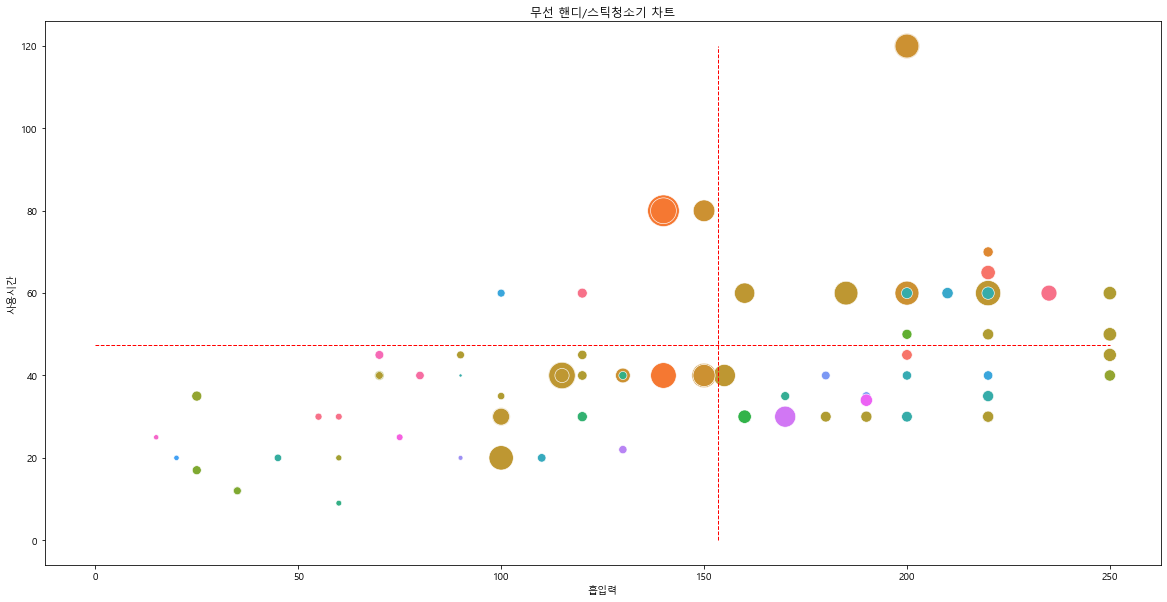

In [17]:
plt.figure(figsize=(20,10))
plt.title('무선 핸디/스틱청소기 차트')
sns.scatterplot(x = '흡입력', y = '사용시간', size = '가격', hue = chart_data['회사명'],
               data = chart_data, sizes = (10, 1000), legend = False)
plt.plot([0, suction_max_value],
        [use_time_mean_value, use_time_mean_value],
        'r--',
        lw = 1)
plt.plot([suction_mean_value, suction_mean_value],
         [0, use_time_max_value],
        'r--',
        lw = 1)
plt.show()

### 인기 제품의 데이터 시각화

In [20]:
chart_data_selected = chart_data[:20]
len(chart_data_selected)

20

In [21]:
# 흡입력 사용시간의 최댓값, 최솟값 구하기
suction_max_value = chart_data_selected['흡입력'].max()
suction_mean_value = chart_data_selected['흡입력'].mean()
use_time_max_vlaue = chart_data_selected['사용시간'].max()
use_time_mean_value = chart_data_selected['사용시간'].mean()

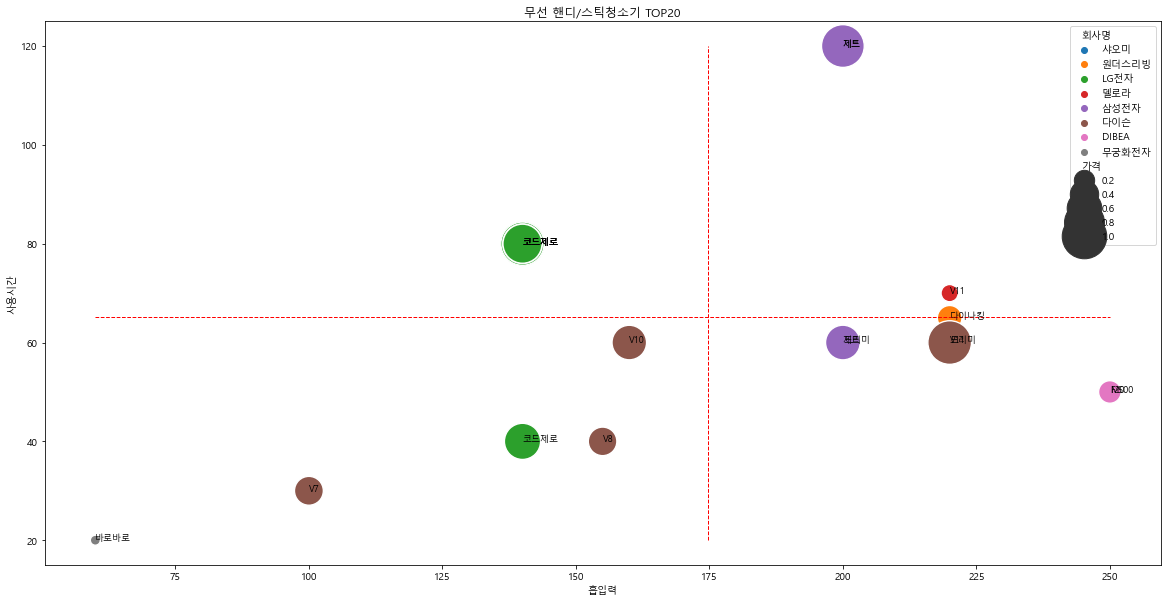

In [29]:
plt.figure(figsize=(20,10))
plt.title('무선 핸디/스틱청소기 TOP20')
sns.scatterplot(x = '흡입력', y = '사용시간', size = '가격',
               hue = chart_data_selected['회사명'],
               data = chart_data_selected, sizes = (100,2000))
plt.plot([60, suction_max_value],
        [use_time_mean_value, use_time_mean_value],
        'r--',
        lw = 1)
plt.plot([suction_mean_value, suction_mean_value],
         [20, use_time_max_value],
        'r--',
        lw = 1)

for index, row in chart_data_selected.iterrows():
    x = row['흡입력']
    y = row['사용시간']
    s = row['제품']. split(' ')[0]
    plt.text(x,y,s, size=9)
plt.show()

* 삼성전자 제품은 흡입력과 사용시간 모두 우수
* DIBEA 제품은 경쟁 제품 보다 가격은 저렴하지만 흡입력은 매우 우수하게 나옴
* 다이슨 제품은 삼성 제품과 가격대 비슷하지만 흡입력이나 사용시간 측면에서는 삼성제품보다 떨어진 것으로 보임